In [95]:
# basic webcrawler to peel data off of UCI webpage
from lxml import html
import requests
page = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data')
tree = html.fromstring(page.text)
info = tree.xpath('//text()')
info = info[0].split(',')

In [96]:
# method to untangle values connected by \n (EX: 'green\nAlbania')
def untangle(arr):
    untangled = []
    for el in arr:
        try: 
            ind = el.index('\n')
        except ValueError:
            ind = -1
        if ind == -1:
            untangled.append(el)
        else:
            untangled.append(el[:ind])
            untangled.append(el[ind+1:])
    return untangled

# group data into rows and convert to a Dataframe
untangled = untangle(info)
usable = [untangled[i:i + 30] for i in range(0, len(untangled), 30)]
import pandas as pd
df = pd.DataFrame(usable)
# remove last buffer row, which contains all None
df = df[:-1]

In [97]:
# replace categorical attribute values with ints 
from sklearn import preprocessing
le17 = preprocessing.LabelEncoder()
le17.fit(df[17])
df[17] = le17.transform(df[17])

le28 = preprocessing.LabelEncoder()
le28.fit(df[28])
df[28] = le28.transform(df[28])

le29 = preprocessing.LabelEncoder()
le29.fit(df[29])
df[29] = le29.transform(df[29])

data = df.drop(df.columns[[0, 6]], axis=1)
target = df[6]

In [98]:
# convert all columns that should be numeric to ints (as they are currently all strings)
indices = []
for i in range(29):
    if i != 0 and i != 17 and i != 28 and i != 29:
        indices.append(i)

df[indices] = df[indices].apply(pd.to_numeric)

In [99]:
# create column headers
df.columns=['country','continent','quadrant','area (thousands of square km)','population (millions)','language','religion','bars','stripes','numOfColors','red','green','blue','gold','white','black','orange','mainColor','numOfCircles','numOfCrosses','numOfSaltires','numOfQuarters','numOfSunStars','crescent','triangle','icon','animate','text','topLeftColor','botRightColor']
df

,country,continent,quadrant,area (thousands of square km),population (millions),language,religion,bars,stripes,numOfColors,...,numOfSaltires,numOfQuarters,numOfSunStars,crescent,triangle,icon,animate,text,topLeftColor,botRightColor
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,0,4
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,5,6
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,3,7
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,1,6
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,1,6
5,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,5,0
6,Anguilla,1,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,6,1
7,Antigua-Barbuda,1,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,0,6
8,Argentina,2,3,2777,28,2,0,0,3,2,...,0,0,0,0,0,0,0,0,1,1
9,Argentine,2,3,2777,28,2,0,0,3,3,...,0,0,1,0,0,0,0,0,1,1


In [100]:
# create decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(data,target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

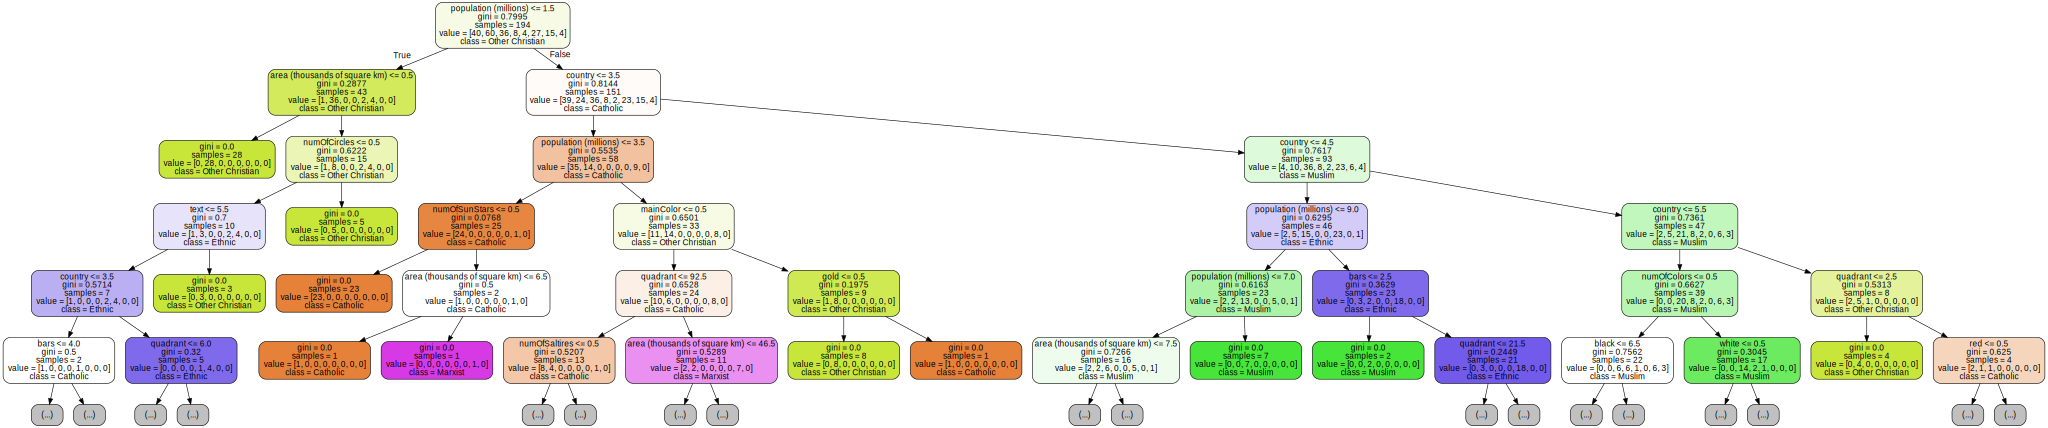

In [103]:
# create visualization of the decision tree created above
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                               max_depth=5,
                               filled=True, rounded=True,
                               feature_names=df.columns,
                               class_names=['Catholic','Other Christian', 'Muslim', 'Buddhist', 'Hindu', 'Ethnic', 'Marxist', 'Other']) 
graph = graphviz.Source(dot_data)  
graph 
